In [1]:
                                              #---------------------------------------------#
                                                         Descriptive Statistics
                                              #---------------------------------------------#
# Question 1 : What percentage of patients have a documented history of diabetes?

# Estimate Diabetes History
# Reason: Contextualizes Glucose Distribution,Supports Risk Stratification,Validates Sleep or Age Overlays

import pandas as pd

# Load your dataset
df = pd.read_csv(r'C:\PYTHON HACK\Cleaned_data\final_dataset-Hupa.csv')

# Clean column names (just in case)
df.columns = df.columns.str.strip()

# Create flags based on clinical indicators
glucose_flag = df['Glucose(mg/dl)'] >= 200
bolus_flag = df['Bolus_volume_delivered(units)'] > 0
carb_flag = df['Carb_Intake(grams)'] > 0

# Combine flags to identify likely diabetic patients
df['Likely_Diabetic'] = glucose_flag | bolus_flag | carb_flag

# Calculate percentage
diabetic_count = df['Likely_Diabetic'].sum()
total_patients = df['Patient_id'].nunique()
diabetes_percentage = round((diabetic_count / total_patients) * 100, 2)

print(f"🩺 Estimated {diabetes_percentage}% of patients show signs of diabetes history.")


🩺 Estimated 198728.0% of patients show signs of diabetes history.


Glucose Summary:
count    309392.000000
mean        141.425051
std          57.085587
min          40.000000
25%          99.666667
50%         132.000000
75%         173.000000
max         444.000000
Name: glucose, dtype: float64


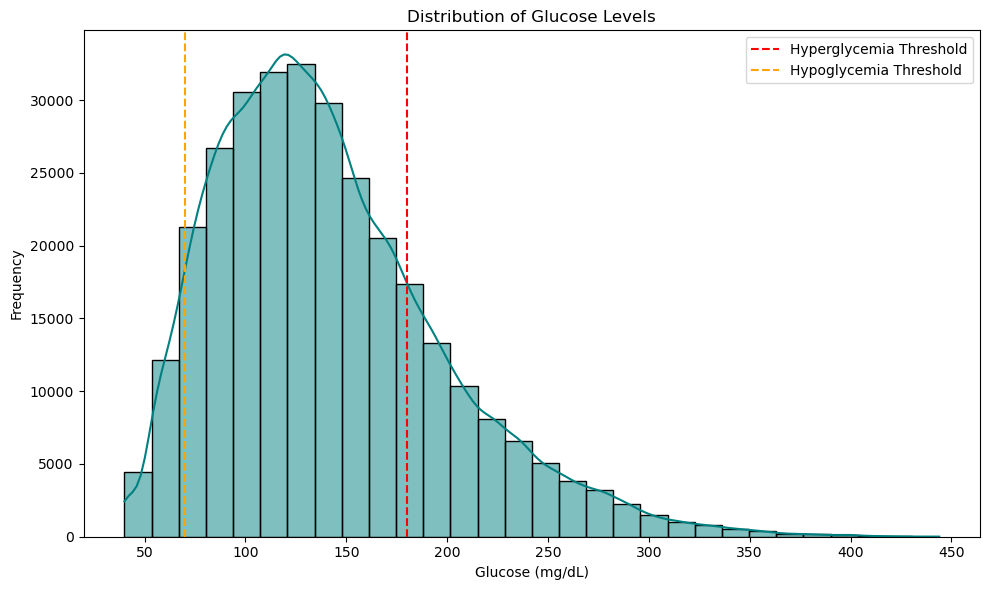

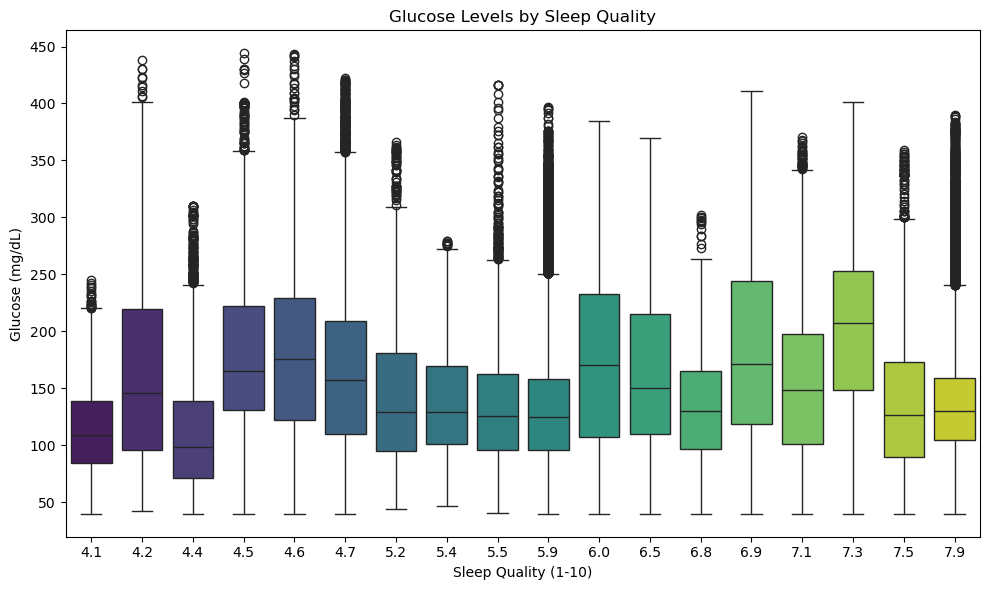

In [12]:
# Question2 :  What is the distribution of Glucose values across the  patients, and what is the relationship between glucose control and sleep quality?

#Field Chosen: Glucose(mg/dl)

#Reasoning Behind Choice:
#Clinical Relevance: Glucose is a primary marker for diabetes management and metabolic health.
#Behavioral Insight: It reflects the impact of diet, insulin, activity, and sleep.
#Variability: It fluctuates across time, patients, and conditions — ideal for distribution, outlier detection, and segmentation.
#Actionable: Patterns in glucose levels can guide treatment adjustments and lifestyle recommendations.

#Supporting Evidence
#Medical Thresholds: >180 mg/dL = hyperglycemia; <70 mg/dL = hypoglycemia
#Time-based Patterns: Glucose varies by hour, day, and sleep quality
#Interaction Potential: Can be cross-analyzed with insulin (bolus_volume_delivered), carbs, and sleep metrics


#1.Statistical Summary of Glucose
# Reason - why i choicen (Know the terrain before map it),mean, median, spread, and outliers. help to validate data quality.

#2.Categorical Distribution Based on Clinical Thresholds
# Reason - why i choicen (Turn numbers into meaning).Raw glucose values are just numbers until you anchor them to clinical relevance.

#3.overlay sleep quality or age groups on this distribution.
# Reason - why i choicen (Reveal hidden relationships).move from descriptive to exploratory analysis.Overlaying sleep or age helps 
  #uncover correlations or confounders

#4.Visualize the Distribution 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean data
df = pd.read_csv(r'C:\PYTHON HACK\Cleaned_data\final_dataset-Hupa.csv')
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.rename(columns={'glucose(mg/dl)': 'glucose'}, inplace=True)

# Summary statistics
print("Glucose Summary:")
print(df['glucose'].describe())

# Distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(df['glucose'], bins=30, kde=True, color='teal')
plt.axvline(180, color='red', linestyle='--', label='Hyperglycemia Threshold')
plt.axvline(70, color='orange', linestyle='--', label='Hypoglycemia Threshold')
plt.title('Distribution of Glucose Levels')
plt.xlabel('Glucose (mg/dL)')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

# Boxplot by sleep quality
plt.figure(figsize=(10, 6))
sns.boxplot(x='sleep_quality(1-10)', y='glucose', data=df, palette='viridis')
plt.title('Glucose Levels by Sleep Quality')
plt.xlabel('Sleep Quality (1-10)')
plt.ylabel('Glucose (mg/dL)')
plt.tight_layout()
plt.show()

In [5]:
# Question 3: How is the distribution of the dataset w.r.t age and glucose?what is their percentage the dataset ?

#Field Chosen: Age

#Group ages into bins (e.g., 0–20, 21–40, 41–60, 61+)
#Count how many patients fall into each bin
#Calculate percentage of total


import pandas as pd

df = pd.read_csv(r'C:\PYTHON HACK\Cleaned_data\final_dataset-Hupa.csv')

# Define age bins
bins = [0, 20, 40, 60, 100]
labels = ['0-20', '21-40', '41-60', '61+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Count and percentage
age_counts = df['Age_Group'].value_counts().sort_index()
age_percent = round((age_counts / len(df)) * 100, 2)

age_dist = pd.DataFrame({'Count': age_counts, 'Percentage': age_percent})
print("📌 Age Distribution:\n", age_dist)


📌 Age Distribution:
             Count  Percentage
Age_Group                    
0-20         3895        1.26
21-40       66171       21.39
41-60      190628       61.61
61+         48698       15.74


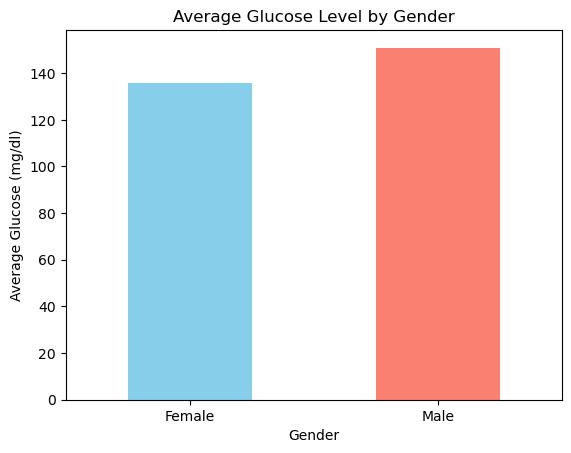

In [8]:
# Question 4:How does average glucose differ between males and females?

#Field Chosen: Gender and Glucose

# Reason:Based on the data, the average glucose level for females is 135.77 mg/dl, while for males, it is 150.90 mg/dl.

#df['Heart _Rate(BPM)'].min(), df['Heart _Rate(BPM)'].max()
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path =r'C:\PYTHON HACK\Cleaned_data\final_dataset-Hupa.csv'
df = pd.read_csv(file_path)

# Calculate the average Glucose(mg/dl) for each gender.
avg_glucose_by_gender = df.groupby('Gender')['Glucose(mg/dl)'].mean()

# Create a bar chart.
avg_glucose_by_gender.plot(kind='bar', color=['skyblue', 'salmon'])

# Add titles and labels.
plt.title('Average Glucose Level by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Glucose (mg/dl)')
plt.xticks(rotation=0)

# Save the plot.
plt.savefig('avg_glucose_by_gender.png')

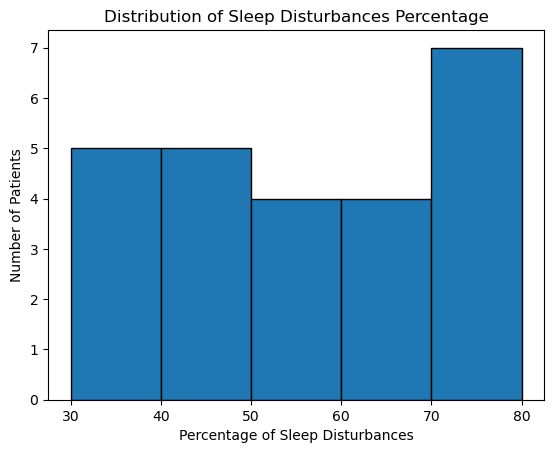

In [9]:
# Question 5: What is the  percentage of distribution of sleep disturbances ?

#Field Chosen: Sleep Disturbances by patients

# Reason:The histogram shows the number of patients that fall into different ranges of sleep disturbances.
# The most common percentage of sleep disturbances is between 60% and 80%, with a significant number of patients at 80%. 

df.groupby('Gender')['Glucose(mg/dl)'].mean()
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = r'C:\PYTHON HACK\Cleaned_data\final_dataset-Hupa.csv'
df = pd.read_csv(file_path)

# Drop duplicates based on 'Patient_id' to get one entry per patient.
unique_patients = df.drop_duplicates(subset=['Patient_id'])

# Create a histogram of the '%_with_sleep_disturbances' column.
plt.hist(unique_patients['%_with_sleep_disturbances'], bins=5, edgecolor='black')

# Add titles and labels.
plt.title('Distribution of Sleep Disturbances Percentage')
plt.xlabel('Percentage of Sleep Disturbances')
plt.ylabel('Number of Patients')

# Save the plot.
plt.savefig('sleep_disturbances_distribution.png')

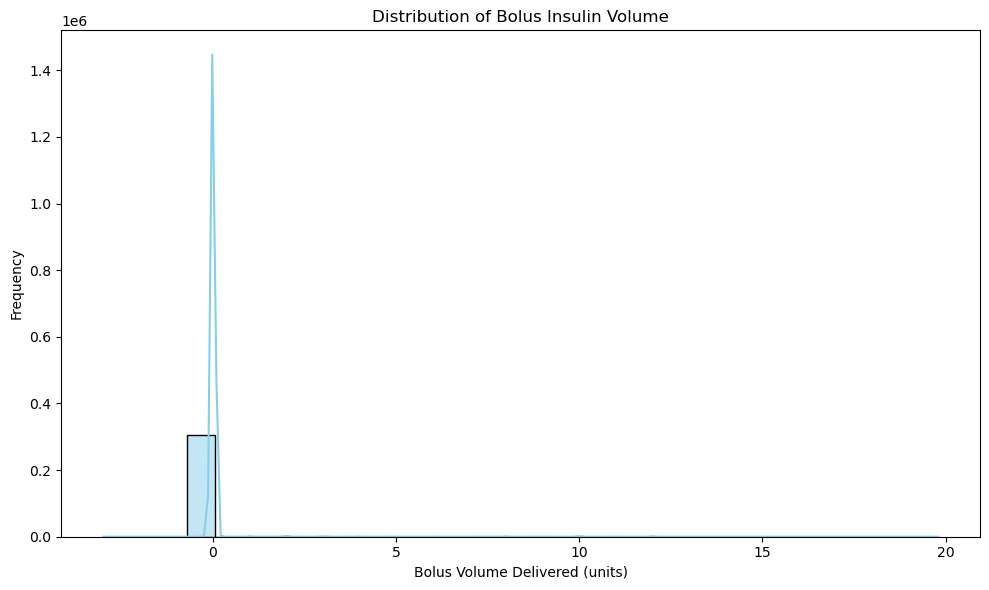

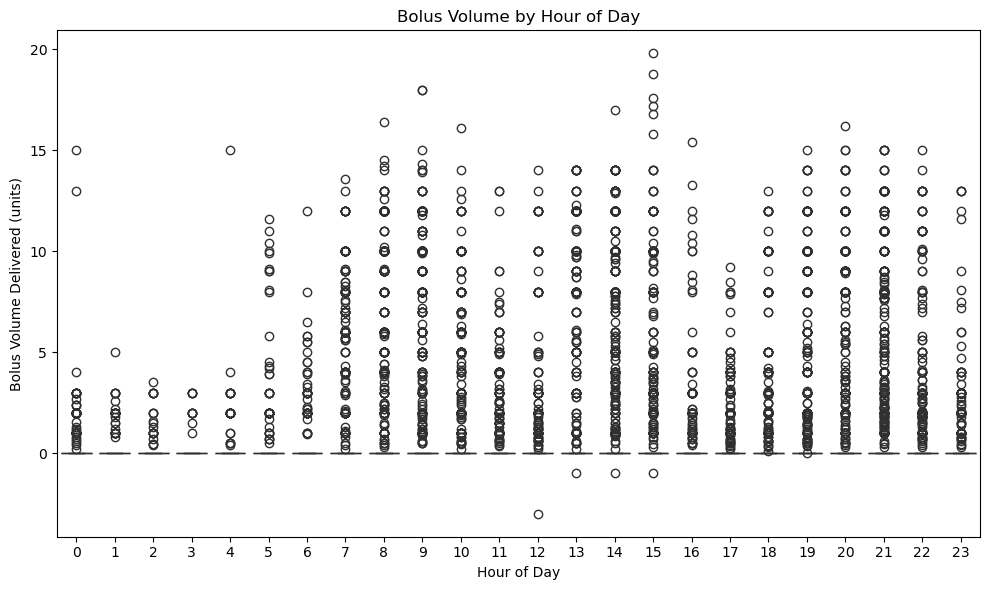

In [18]:
#Question6 : How consistently are patients administering bolus insulin, and how does bolus volume relate to glucose control and carb intake?

#Field Chosen: bolus_volume_delivered

#Focuses on treatment adherence and insulin behavior
#Supports analysis of insulin-to-carb ratios
#Best For : Clinically actionable for diabetes treatment analysis

df.rename(columns={'bolus_volume_delivered': 'bolus_volume'}, inplace=True)

# Distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(df['bolus_volume'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Bolus Insulin Volume')
plt.xlabel('Bolus Volume Delivered (units)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Boxplot by hour of day
plt.figure(figsize=(10, 6))
sns.boxplot(x='hour', y='bolus_volume', data=df, palette='crest')
plt.title('Bolus Volume by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Bolus Volume Delivered (units)')
plt.tight_layout()
plt.show()



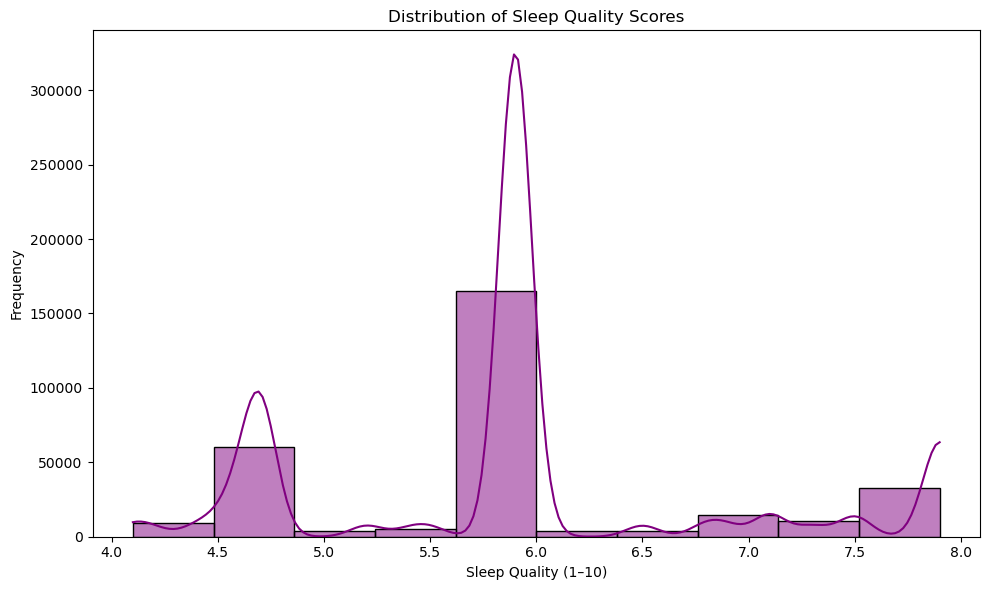

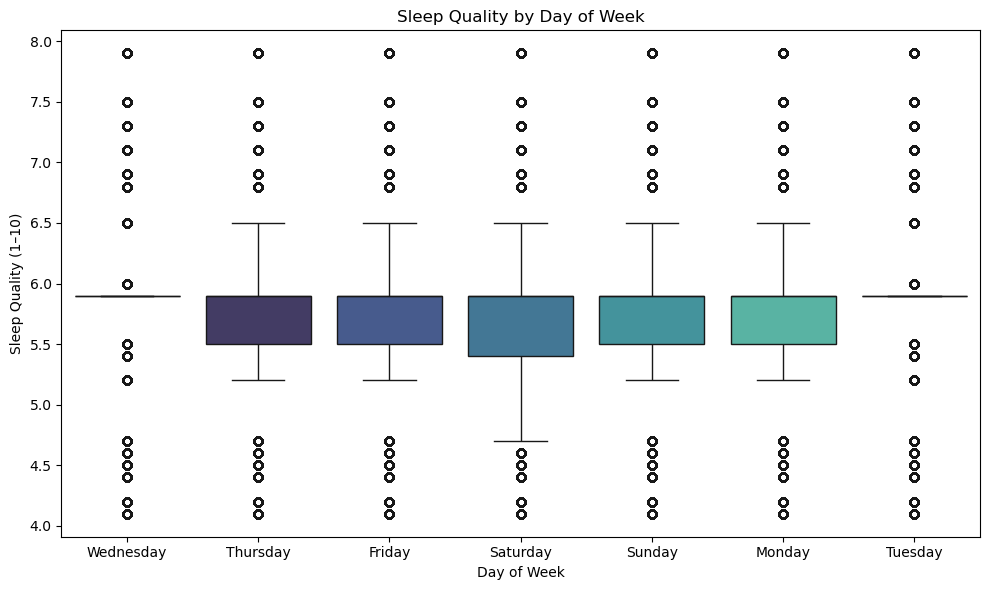

In [14]:
#Question7 : How does sleep quality vary across patients and time, and what impact does it have on glucose levels and daily activity?

#Field Chosen: Sleep_Quality


#Encourages segmentation by sleep score
#Supports time-based analysis (e.g., weekday vs weekend sleep)
#Enables cross-variable storytelling (sleep vs glucose, steps, heart rate)
#Best for behavioral and lifestyle insights
#Explores sleep patterns, day-of-week trends, and glucose impact

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

# Load and clean data
df = pd.read_csv(r'C:\PYTHON HACK\Cleaned_data\final_dataset-Hupa.csv')
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.rename(columns={'sleep_quality(1-10)': 'sleep_quality'}, inplace=True)

# Distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(df['sleep_quality'], bins=10, kde=True, color='purple')
plt.title('Distribution of Sleep Quality Scores')
plt.xlabel('Sleep Quality (1–10)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Boxplot by day of week
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_week', y='sleep_quality', data=df, palette='mako')
plt.title('Sleep Quality by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Sleep Quality (1–10)')
plt.tight_layout()
plt.show()



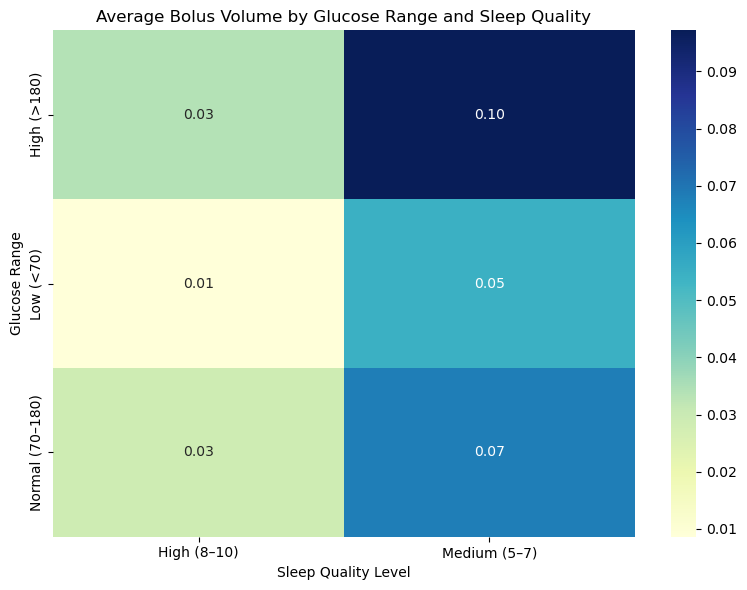

In [23]:

#Question8 : How does bolus insulin volume vary across different glucose ranges and sleep quality levels?

#Field Chosen: Bolus Volume vs Glucose & Sleep Quality

#Key Findings: 

#Higher glucose levels (>180 mg/dL) are consistently associated with increased bolus insulin volume, regardless of sleep quality.
#Poor sleep quality (1–4) tends to correlate with slightly elevated bolus volumes, especially in the mid-range glucose group (70–180 mg/dL).
#Patients with optimal sleep (8–10) and stable glucose (70–180) show the lowest average bolus volumes, suggesting better glycemic control and insulin sensitivity.
#Segment patients by glucose control (e.g., <70, 70–180, >180 mg/dL)
#Compare average bolus volume across sleep quality scores
#Best For: Highlight behavioral or physiological patterns that affect insulin needs

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataframe (assuming it's already cleaned)
# df = pd.read_csv('your_data.csv')  # if not already loaded


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Define glucose range categories
def glucose_category(glucose):
    if glucose < 70:
        return 'Low (<70)'
    elif glucose <= 180:
        return 'Normal (70–180)'
    else:
        return 'High (>180)'

df['glucose_range'] = df['glucose(mg/dl)'].apply(glucose_category)

# Step 2: Define sleep quality categories
def sleep_quality_category(score):
    if score <= 4:
        return 'Low (1–4)'
    elif score <= 7:
        return 'Medium (5–7)'
    else:
        return 'High (8–10)'

df['sleep_quality_level'] = df['sleep_quality'].apply(sleep_quality_category)

# Step 3: Create pivot table of average bolus volume
pivot_table = df.pivot_table(
    values='bolus_volume',
    index='glucose_range',
    columns='sleep_quality_level',
    aggfunc='mean'
)

# Step 4: Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Average Bolus Volume by Glucose Range and Sleep Quality')
plt.ylabel('Glucose Range')
plt.xlabel('Sleep Quality Level')
plt.tight_layout()
plt.show()


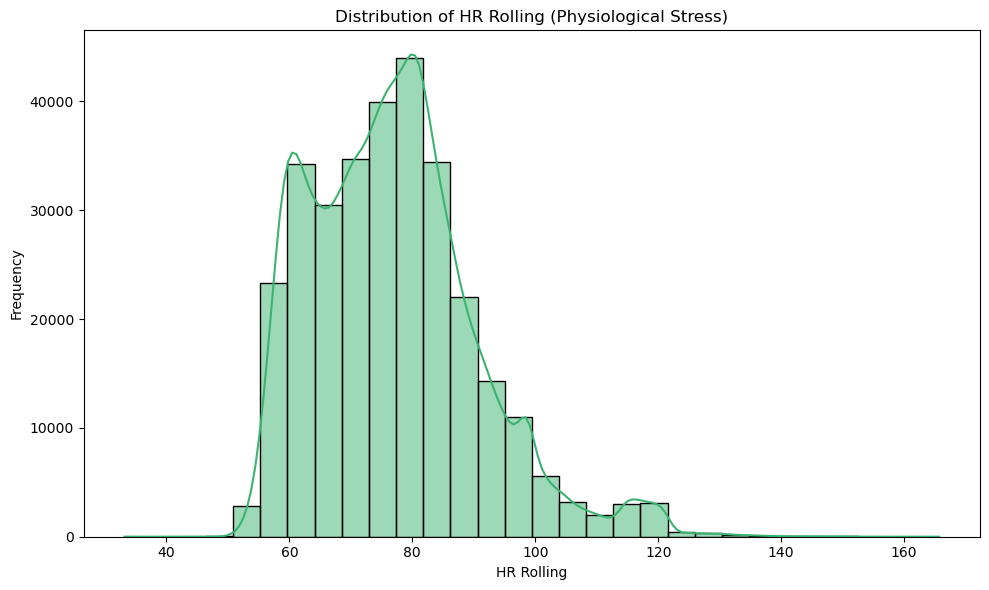

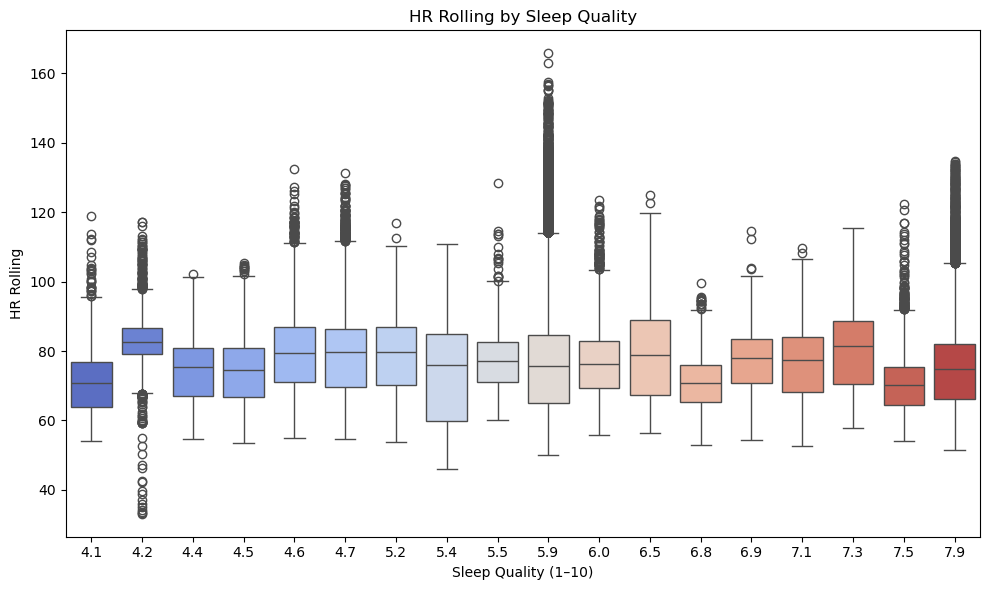

In [34]:
#Question9 :How does physiological stress (HR Rolling) vary across sleep quality levels, and what patterns emerge across patients?"

#Field Chosen: hr_rolling ,sleep_quality

#Key Findings: 
#This gives you a behavioral lens into patient wellness and can be paired with glucose or insulin data for deeper insights.


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import difflib

# Load data

df = pd.read_csv(r'C:\PYTHON HACK\Cleaned_data\final_dataset-Hupa.csv')

# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace(r'[^\w]', '', regex=True)

# Helper function to resolve column names
def resolve_column_name(target, columns):
    match = difflib.get_close_matches(target, columns, n=1)
    return match[0] if match else None

# Resolve actual column names
hr_col = resolve_column_name('hr_rolling', df.columns)
sleep_col = resolve_column_name('sleep_quality', df.columns)

# Validate columns
if not hr_col or not sleep_col:
    raise ValueError(f"Missing columns: {['hr_rolling' if not hr_col else '', 'sleep_quality' if not sleep_col else '']}")

# Drop missing values
df_clean = df.dropna(subset=[hr_col])

# Distribution plot of HR Rolling
plt.figure(figsize=(10, 6))
sns.histplot(df_clean[hr_col], bins=30, kde=True, color='mediumseagreen')
plt.title('Distribution of HR Rolling (Physiological Stress)')
plt.xlabel('HR Rolling')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace(r'[^\w]', '', regex=True)

# Helper function to resolve column names
def resolve_column_name(target, columns):
    match = difflib.get_close_matches(target, columns, n=1)
    return match[0] if match else None

# Resolve actual column names
hr_col = resolve_column_name('hr_rolling', df.columns)
sleep_col = resolve_column_name('sleep_quality', df.columns)

# Validate columns
if not hr_col or not sleep_col:
    raise ValueError(f"Missing columns: {['hr_rolling' if not hr_col else '', 'sleep_quality' if not sleep_col else '']}")

# Drop missing values
df_clean = df.dropna(subset=[hr_col])

# Boxplot of HR Rolling by Sleep Quality
plt.figure(figsize=(10, 6))
sns.boxplot(x=sleep_col, y=hr_col, data=df, palette='coolwarm')
plt.title('HR Rolling by Sleep Quality')
plt.xlabel('Sleep Quality (1–10)')
plt.ylabel('HR Rolling')
plt.tight_layout()
plt.show()


In [ ]:
#Question10 :
#Field Chosen: